In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import numpy as np
from matplotlib import pyplot as plt
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from scipy.linalg import sqrtm
from qtm import *
from qtm_multiqubit import *
import constant 


Step 0: 0.5037
     ┌───┐          ┌───────────────┐ ┌───────────────┐ ┌───────────────┐      »
q_0: ┤ H ├──■────■──┤ RZ(0.0019478) ├─┤ RX(0.0020106) ├─┤ RZ(0.0045867) ├───■──»
     └───┘┌─┴─┐  │  └┬──────────────┤ ├───────────────┴┐├───────────────┴┐┌─┴─┐»
q_1: ─────┤ X ├──┼───┤ RZ(0.002042) ├─┤ RX(-0.0036442) ├┤ RZ(0.00072257) ├┤ X ├»
          └───┘┌─┴─┐┌┴──────────────┴┐├────────────────┤├────────────────┤└───┘»
q_2: ──────────┤ X ├┤ RZ(0.00043982) ├┤ RX(0.00069115) ├┤ RZ(0.00084823) ├─────»
               └───┘└────────────────┘└────────────────┘└────────────────┘     »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«          ┌───┐┌───────────────┐┌────────────────┐ ┌───────────────┐    ┌─┐   
«q_0: ─────┤ X ├┤ RZ(-0.002042) ├┤ RX(-0.0011624) ├─┤ RZ(0.0015394) ├────┤M├───
«          └─┬─┘└┬─────────────┬┘├────────────────┤ ├───────────────┴┐┌─┐└╥┘   
«q_1: ──■────┼──

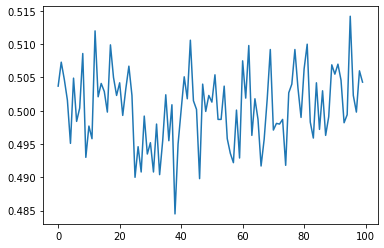

In [25]:
def u_cluster_multiqubit(qc, thetas):
    qc = u_thetas_multiqubit(qc, thetas[0])
    qc = entanglement_multiqubit(qc)
    qc = u_thetas_multiqubit(qc, thetas[1])
    return qc
def grad_l_multiqubit(qc, thetas, r, s, measurement_basis = 'z'):
    gradient_l = np.zeros((thetas).shape)
    for i in range(0, thetas.shape[0]):
        for j in range(0, thetas.shape[1]):
            for k in range(0, thetas.shape[2]):
                thetas1, thetas2 = thetas.copy(), thetas.copy()
                thetas1[i, j, k] += s
                thetas2[i, j, k] -= s
                qc1 = u_cluster_multiqubit(qc.copy(), thetas1)
                qc2 = u_cluster_multiqubit(qc.copy(), thetas1)
                gradient_l[i, j, k] = -r*(
                    measure(qc1, range(qc.num_qubits), range(qc.num_qubits), "000") - 
                    measure(qc2, range(qc.num_qubits), range(qc.num_qubits), "000"))
    return gradient_l

thetas = np.zeros((2, 3, 3))
qc = QuantumCircuit(3,3)
qc = create_ghz_state(qc)

loss_values = []
for i in range(0, 100):
    thetas = thetas - constant.learning_rate*grad_l_multiqubit(qc, thetas, np.pi/2, 1/2)
    qc_copy = u_cluster_multiqubit(qc.copy(), thetas)
    loss = 1 - measure(qc_copy, range(qc_copy.num_qubits), range(qc_copy.num_qubits), "000")
    if i % 30 == 0:
        print('Step ' + str(i) + ': ' + str(loss) )
        print(qc_copy.draw())
    loss_values.append(loss)

plt.plot(loss_values)


    

In [21]:
from qiskit.ignis.verification import count_gates


thetas = np.zeros((2, 3, 3))
qc = QuantumCircuit(3,3)
qc = create_ghz_state(qc)
qc = u_cluster_multiqubit(qc, thetas)
measure(qc, qubits = [0, 1, 2], cbits = [0, 1, 2], counter='000')
print(count_gates(qc, basis=['rz', 'rx', 'h', 'cnot'], qubits=[0,1,2]))
print(qc.draw())
# qc.data.pop()
# qc.data.pop()
# qc.data.pop()
# print(qc.draw())

# psi = qi.Statevector.from_instruction(qc)
# psi_hat = qi.Statevector(get_psi_hat(thetas))
# rho_psi = qi.DensityMatrix(psi)
# rho_psi_hat = qi.DensityMatrix(psi_hat)

# print(psi)
# print(psi_hat)

# plt.show()
# plt.plot(ls)
# plt.xlabel("Step")
# plt.ylabel("Loss value")
# plt.show()
    

C:\Users\haime\AppData\Local\Programs\Python\Python37\lib\site-packages\qiskit\ignis\verification\randomized_benchmarking\rb_utils.py:51: DeprecationWarning: The function `count_gates` will be deprecated. Gate count is integrated into `gates_per_clifford` function.
  category=DeprecationWarning)


AttributeError: 'QuantumCircuit' object has no attribute 'experiments'